In [1]:
import sys

sys.path.append('../..') # Add backtester base dir to $PYTHONPATH

In [2]:
%config InlineBackend.figure_format="retina"
%matplotlib inline
import pyfolio as pf
import pandas as pd
import os
import matplotlib.pyplot as plt
import altair as alt

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (14, 8)

/usr/local/anaconda3/lib/python3.7/site-packages/empyrical/utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)
/usr/local/anaconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [3]:
from backtester.datahandler import HistoricalOptionsData
from backtester.strategy import Strategy, StrategyLeg
from backtester.option import Type, Direction
from backtester import Backtest
from backtester.statistics import monthly_returns_heatmap, returns_histogram, returns_chart

In [4]:
# Cleaned up data
data = HistoricalOptionsData("options_data_clean_v2.h5", key="/SPX", where='quotedate >= "2006-12-06" & quotedate <= "2015-08-21"')
schema = data.schema

In [5]:
# Iron Condor
iron_condor = Strategy(schema)

leg1 = StrategyLeg("leg_1", schema, option_type=Type.PUT, direction=Direction.BUY)
leg1.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 40) & (schema.dte <= 50) & (schema.strike <= 0.85 * schema.underlying_last)
leg1.exit_filter = (schema.dte <= 2)

leg2 = StrategyLeg("leg_2", schema, option_type=Type.PUT, direction=Direction.SELL)
leg2.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 40) & (schema.dte <= 50) & (schema.strike >= 0.90 * schema.underlying_last) & (schema.strike <= schema.underlying_last)
leg2.exit_filter = (schema.dte <= 2)

leg3 = StrategyLeg("leg_3", schema, option_type=Type.CALL, direction=Direction.SELL)
leg3.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 40) & (schema.dte <= 50) & (schema.strike >= schema.underlying_last) & (schema.strike <= 1.10 * schema.underlying_last)
leg3.exit_filter = (schema.dte <= 2)

leg4 = StrategyLeg("leg_4", schema, option_type=Type.PUT, direction=Direction.BUY)
leg4.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 40) & (schema.dte <= 50) & (schema.strike >= 1.15 * schema.underlying_last)
leg4.exit_filter = (schema.dte <= 2)


iron_condor.add_legs([leg1, leg2, leg3, leg4])
iron_condor.exit_thresholds = (0.25, 0.25)

In [44]:
bt = Backtest()
bt.strategy = iron_condor
bt.data = data
bt.stop_if_broke = False

In [45]:
bt.run(monthly=False)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:07:24


leg_1                                                     \
               contract underlying expiration type strike  cost      order   
0    SPZ080419P00700000        SPX 2008-04-19  put  700.0  10.0  Order.BTO   
1    SPZ080419P00700000        SPX 2008-04-19  put  700.0  -0.0  Order.STC   
2    SPV081220P00200000        SPX 2008-12-20  put  200.0  55.0  Order.BTO   
3    SPV081220P00200000        SPX 2008-12-20  put  200.0 -10.0  Order.STC   
4    SPV081220P00200000        SPX 2008-12-20  put  200.0  50.0  Order.BTO   
..                  ...        ...        ...  ...    ...   ...        ...   
832  SPX150821P00800000        SPX 2015-08-21  put  800.0  -0.0  Order.STC   
833  SPX150918P00500000        SPX 2015-09-18  put  500.0  -0.0  Order.STC   
834  SPX150918P00600000        SPX 2015-09-18  put  600.0  -0.0  Order.STC   
835  SPX150918P00700000        SPX 2015-09-18  put  700.0  -0.0  Order.STC   
836  SPX150918P00825000        SPX 2015-09-18  put  825.0  -0.0  Order.STC   

                  leg_2                        ...               leg_4  \
               contract underlying expiration  ...            contract   
0    SPT080419P01170000        SPX 2008-04-19  ...  SXM080419P01520000   
1    SPT080419P01170000        SPX 2008-04-19  ...  SXM080419P01520000   
2    SPX081220P00815000        SPX 2008-12-20  ...  SPQ081220P01045000   
3    SPX081220P00815000        SPX 2008-12-20  ...  SPQ081220P01045000   
4    SPX081220P00830000        SPX 2008-12-20  ...  SPQ081220P01060000   
..                  ...        ...        ...  ...                 ...   
832  SPX150821P01845000        SPX 2015-08-21  ...  SPX150821P02600000   
833  SPX150918P01900000        SPX 2015-09-18  ...  SPX150918P02450000   
834  SPX150918P01895000        SPX 2015-09-18  ...  SPX150918P02500000   
835  SPX150918P01890000        SPX 2015-09-18  ...  SPX150918P02550000   
836  SPX150918P01880000        SPX 2015-09-18  ...  SPX150918P02400000   

                                                             totals         \
    underlying expiration type  strike     cost      order     cost    qty   
0          SPX 2008-04-19  put  1520.0  22640.0  Order.BTO  17080.0   58.0   
1          SPX 2008-04-19  put  1520.0     -0.0  Order.STC   5400.0   58.0   
2          SPX 2008-12-20  put  1045.0  15440.0  Order.BTO   5505.0  181.0   
3          SPX 2008-12-20  put  1045.0 -12150.0  Order.STC  -1070.0  181.0   
4          SPX 2008-12-20  put  1060.0  15100.0  Order.BTO   6240.0  160.0   
..         ...        ...  ...     ...      ...        ...      ...    ...   
832        SPX 2015-08-21  put  2600.0 -52120.0  Order.STC -49045.0   19.0   
833        SPX 2015-09-18  put  2450.0 -41660.0  Order.STC -39960.0   31.0   
834        SPX 2015-09-18  put  2500.0 -52480.0  Order.STC -49100.0   27.0   
835        SPX 2015-09-18  put  2550.0 -57480.0  Order.STC -54100.0   23.0   
836        SPX 2015-09-18  put  2400.0 -42490.0  Order.STC -39160.0   34.0   

                
          date  
0   2008-03-07  
1   2008-03-10  
2   2008-11-06  
3   2008-11-07  
4   2008-11-10  
..         ...  
832 2015-08-19  
833 2015-08-20  
834 2015-08-21  
835 2015-08-21  
836 2015-08-21  

[837 rows x 31 columns]

In [46]:
bt.summary()

,Strategy
Total trades,417
Number of wins,141
Number of losses,276
Win %,33.81%
Largest loss,$1303840.00
Profit factor,0.51
Average profit,$-126216.80
Average P&L %,0.44%
Total P&L %,-5657.95%


/usr/local/anaconda3/lib/python3.7/site-packages/empyrical/stats.py:445: RuntimeWarning: invalid value encountered in double_scalars
  return ending_value ** (1 / num_years) - 1
/usr/local/anaconda3/lib/python3.7/site-packages/empyrical/stats.py:1492: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Start date,2006-12-06
End date,2015-08-21
Total months,104
,Backtest
Annual return,nan%
Cumulative returns,-5413.5%
Annual volatility,296.1%
Sharpe ratio,0.37
Calmar ratio,NaN
Stability,NaN
Max drawdown,-5009.7%


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5009.68,2009-03-09,2015-07-20,NaT,NaN
1,386.80,2008-03-06,2009-01-06,2009-03-09,263
2,0.00,2006-12-06,2006-12-06,2006-12-06,1
3,0.00,2006-12-06,2006-12-06,2006-12-06,1
4,0.00,2006-12-06,2006-12-06,2006-12-06,1


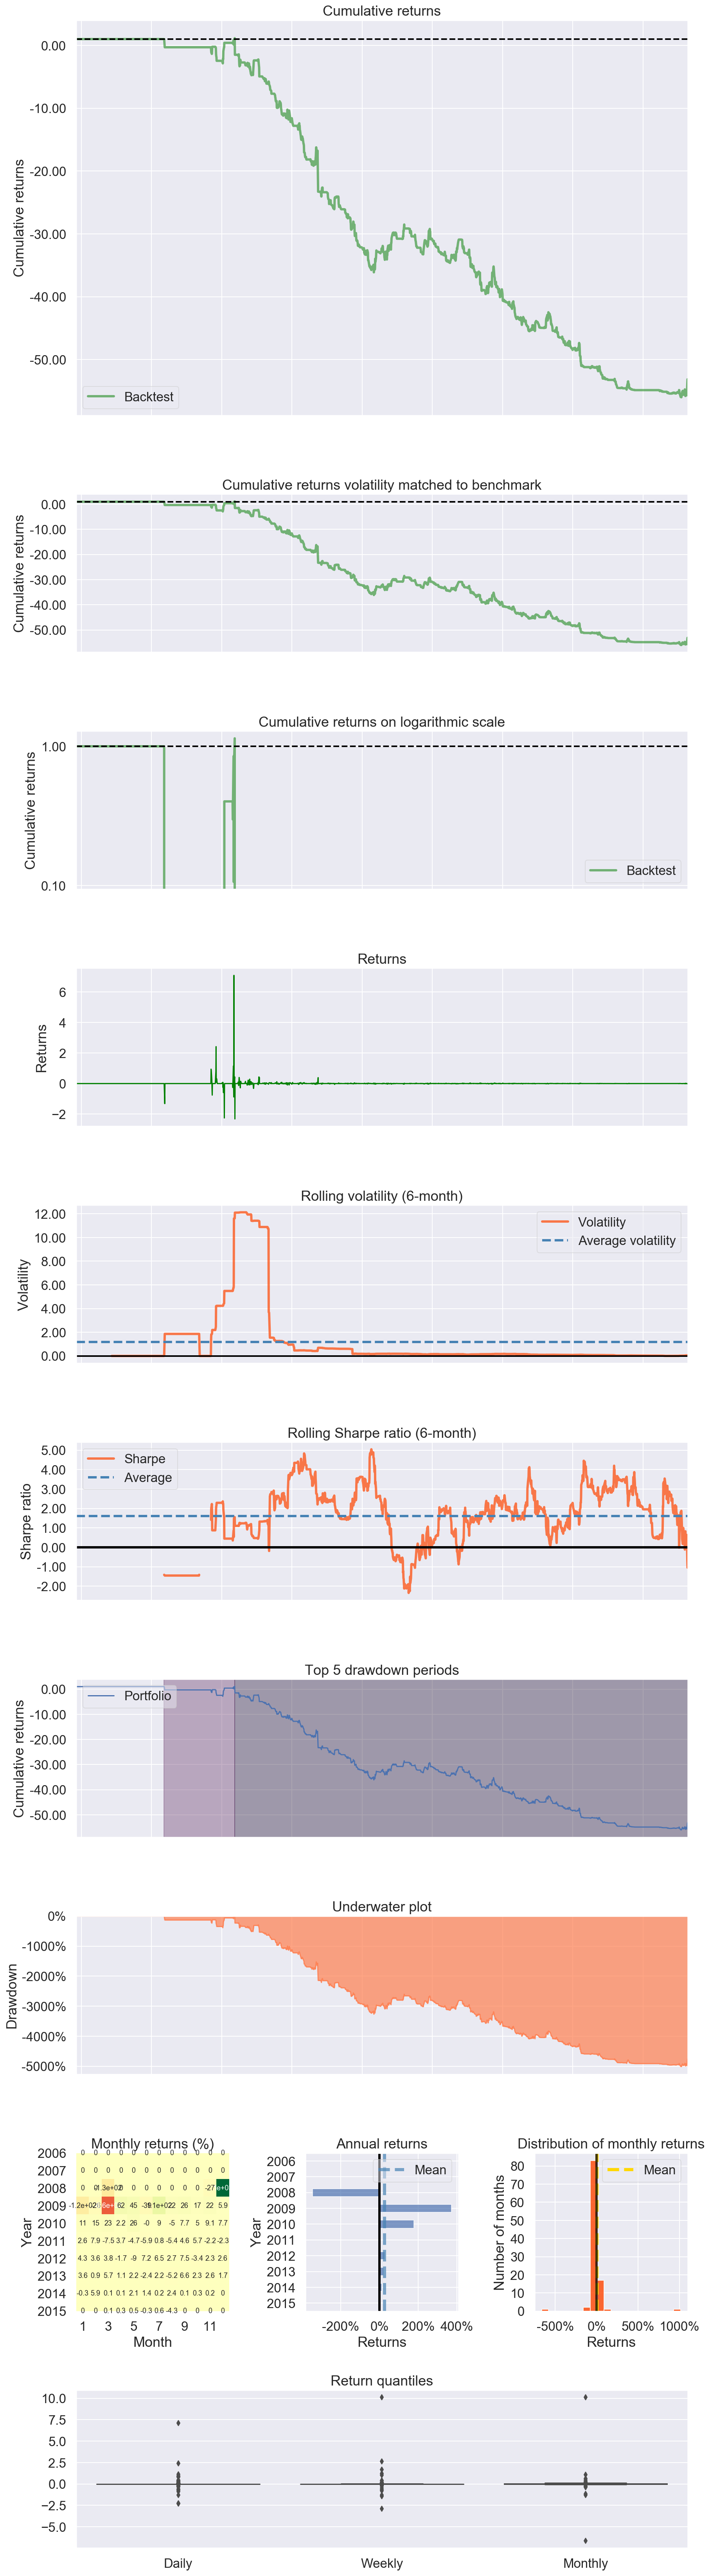

In [47]:
pf.create_returns_tear_sheet(returns = bt.balance['% change'].dropna())